#### Develop a user-friendly subprogram for the modified false-position method based on Fig.5.15.
#### Test the program by determining the root of the function described in Example 5.6.
#### Perform a number of runs until the true percent relative error falls below 0.01%

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# data
ea = 1.0    # approximate relative error
et = 1.0    # true relative error

xl = 0.0    # lower bond of x
xu = 1.3    # upper bond of x

xr_before = 0.0
xr_current = 0.0

true_value = 1.0

et_list = []
ea_list = []

In [45]:
# function definition
def func(x):
    return x**10 - 1

def x_range_decision(xl_local, xu_local, xr_local):

    judgement = func(xl_local) * func(xr_local)
    if judgement < 0:
        return xl_local, xr_local # xu <- xr
    elif judgement > 0:
        return xr_local, xu_local # xl <- xr
    else:
        if func(xl_local) == 0:
            return xl_local, xl_local # xl_local is an answer
        else:
            return xr_local, xr_local # xr_local is an answer

iteration time: 44
approximate answer: 0.999918


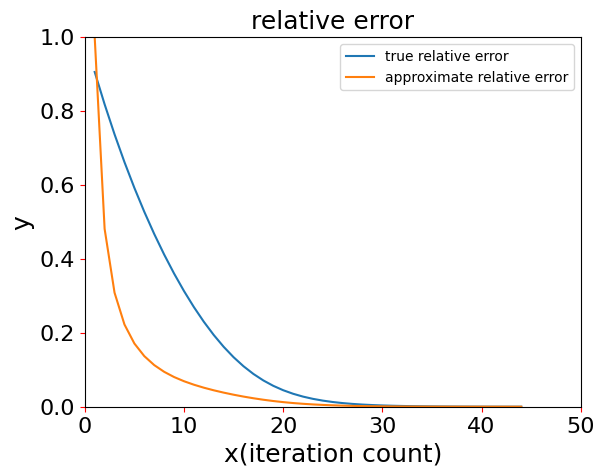

In [49]:
# evaluate
while et > 0.0001:
    xr_before = xr_current
    #------------------------------ a new iteration
    xr_current = xu - func(xu) * (xl - xu) / (func(xl) - func(xu)) # false position method
    xl, xu = x_range_decision(xl, xu, xr_current)

    et = abs((true_value - xr_current) / true_value)
    ea = abs((xr_current - xr_before) / xr_current)

    et_list.append(et)
    ea_list.append(ea)

print("iteration time: %d" % len(et_list))
print("approximate answer: %f" % xr_current)

# plot
x_iteration = np.linspace(1, len(et_list), len(et_list))

fig = plt.figure()

axes = fig.add_subplot(111)

func_et, = axes.plot(x_iteration, et_list, label="true relative error")
func_ea, = axes.plot(x_iteration, ea_list, label="approximate relative error")

plt.title("relative error", fontsize=18)
plt.xlabel("x(iteration count)", fontsize=18)
plt.ylabel("y", fontsize=18)

plt.legend(handles=[func_et, func_ea], loc="best")

plt.tick_params(axis="both", labelsize=16, color="red")
plt.axis([0, 50, 0, 1]) #x-axis show 0~50, y-axis show 0~1

#------------------------------------------
plt.show()
